In [1]:
## Automated Crypto Website API Pull

In [11]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
 #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
      'start':'1',
      'limit':'16',
      'convert':'USD'
    }
headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b4e15149-2a8c-48ce-80a9-79ac23cc1477',
    }

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
      #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

In [12]:
import pandas as pd
pd.set_option('display.max.columns',None)
df = pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now') ##Appending new column to log time when each request is run

In [13]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'16',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b4e15149-2a8c-48ce-80a9-79ac23cc1477',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df_temp = pd.json_normalize(data['data']) ##Original df is already set up, so now appending to that df here.
    df_temp['timestamp']=pd.to_datetime('now') ##Appending new column to log time when each request is run
    df=pd.concat([df,df_temp],ignore_index=True)
    
    if not os.path.isfile('/Users/tanmac/Desktop/DA/Python Jupyter Project/Crypto API.csv'): ##Exporting data to csv
         df_temp.to_csv('/Users/tanmac/Desktop/DA/Python Jupyter Project/Crypto API.csv',header='column_names')
    else:
         df_temp.to_csv('/Users/tanmac/Desktop/DA/Python Jupyter Project/Crypto API.csv',mode='a',header=False)

In [14]:
## Script to automatically run this
import os
from time import time, sleep ##Able to track time through this

In [15]:
df = pd.DataFrame()
for i in range(333): ##Since the crypto website only allows 333 pulls in one day
   api_runner()
   print(f"API Pull #{i+1} complete")
   sleep(60) #Sleep for 1 minute
exit()

API Pull #1 complete
API Pull #2 complete
API Pull #3 complete
API Pull #4 complete
API Pull #5 complete
API Pull #6 complete


KeyboardInterrupt: 

In [16]:
df82 = pd.read_csv('/Users/tanmac/Desktop/DA/Python Jupyter Project/Crypto API.csv')
##df82 ## Random variable assigned to just check progress of dataframe

In [17]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [18]:
df_grpd = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [19]:
df_grpd

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.00352,0.46858,-0.08750,14.44653,8.22503,35.70916
Ethereum,0.96625,6.89155,27.67218,53.54834,46.11815,137.45729
XRP,0.17347,2.60419,24.55136,66.06619,45.47715,68.39498
Tether USDt,0.00438,-0.00527,-0.00917,0.01821,0.00107,0.02339
BNB,0.70143,3.07570,9.40977,17.22550,12.69071,25.62332
Solana,0.66450,2.75832,13.02675,28.12387,4.58637,33.75518
USDC,0.00427,-0.00090,-0.01548,-0.00512,-0.00174,-0.00664
Dogecoin,5.53787,9.42253,32.96126,62.86852,12.32415,66.86502
Cardano,0.70177,5.70711,18.47423,51.01860,11.81673,38.83726


In [20]:
##To plot this, stacking into rows(subrows) will be much better for a cleaner visualization
df1 = df_grpd.stack()
type(df1) ##df after stacking becomes a series; No longer a Pandas df, so need to convert series back to dataframe

pandas.core.series.Series

In [22]:
pd.set_option('display.max.rows',None)
##df1

In [24]:
df2 = df1.to_frame(name='values')
##df2

In [25]:
## Setting index the normal way will give key error above, so a new index needs to be created from scratch
## Normal way: df2.set_index(df2['name'])
## Appropriate way:
index = pd.Index(range(96)) ##Since df2.count() yields total 95 values
df3=df2.reset_index()
df3
df4=df3.rename(columns={'level_1':'percent_change'})
##df4['percent_change'].replace(['quote.USD.percent_change_1h'],['1h']) -> To change name of x-axis values if needed

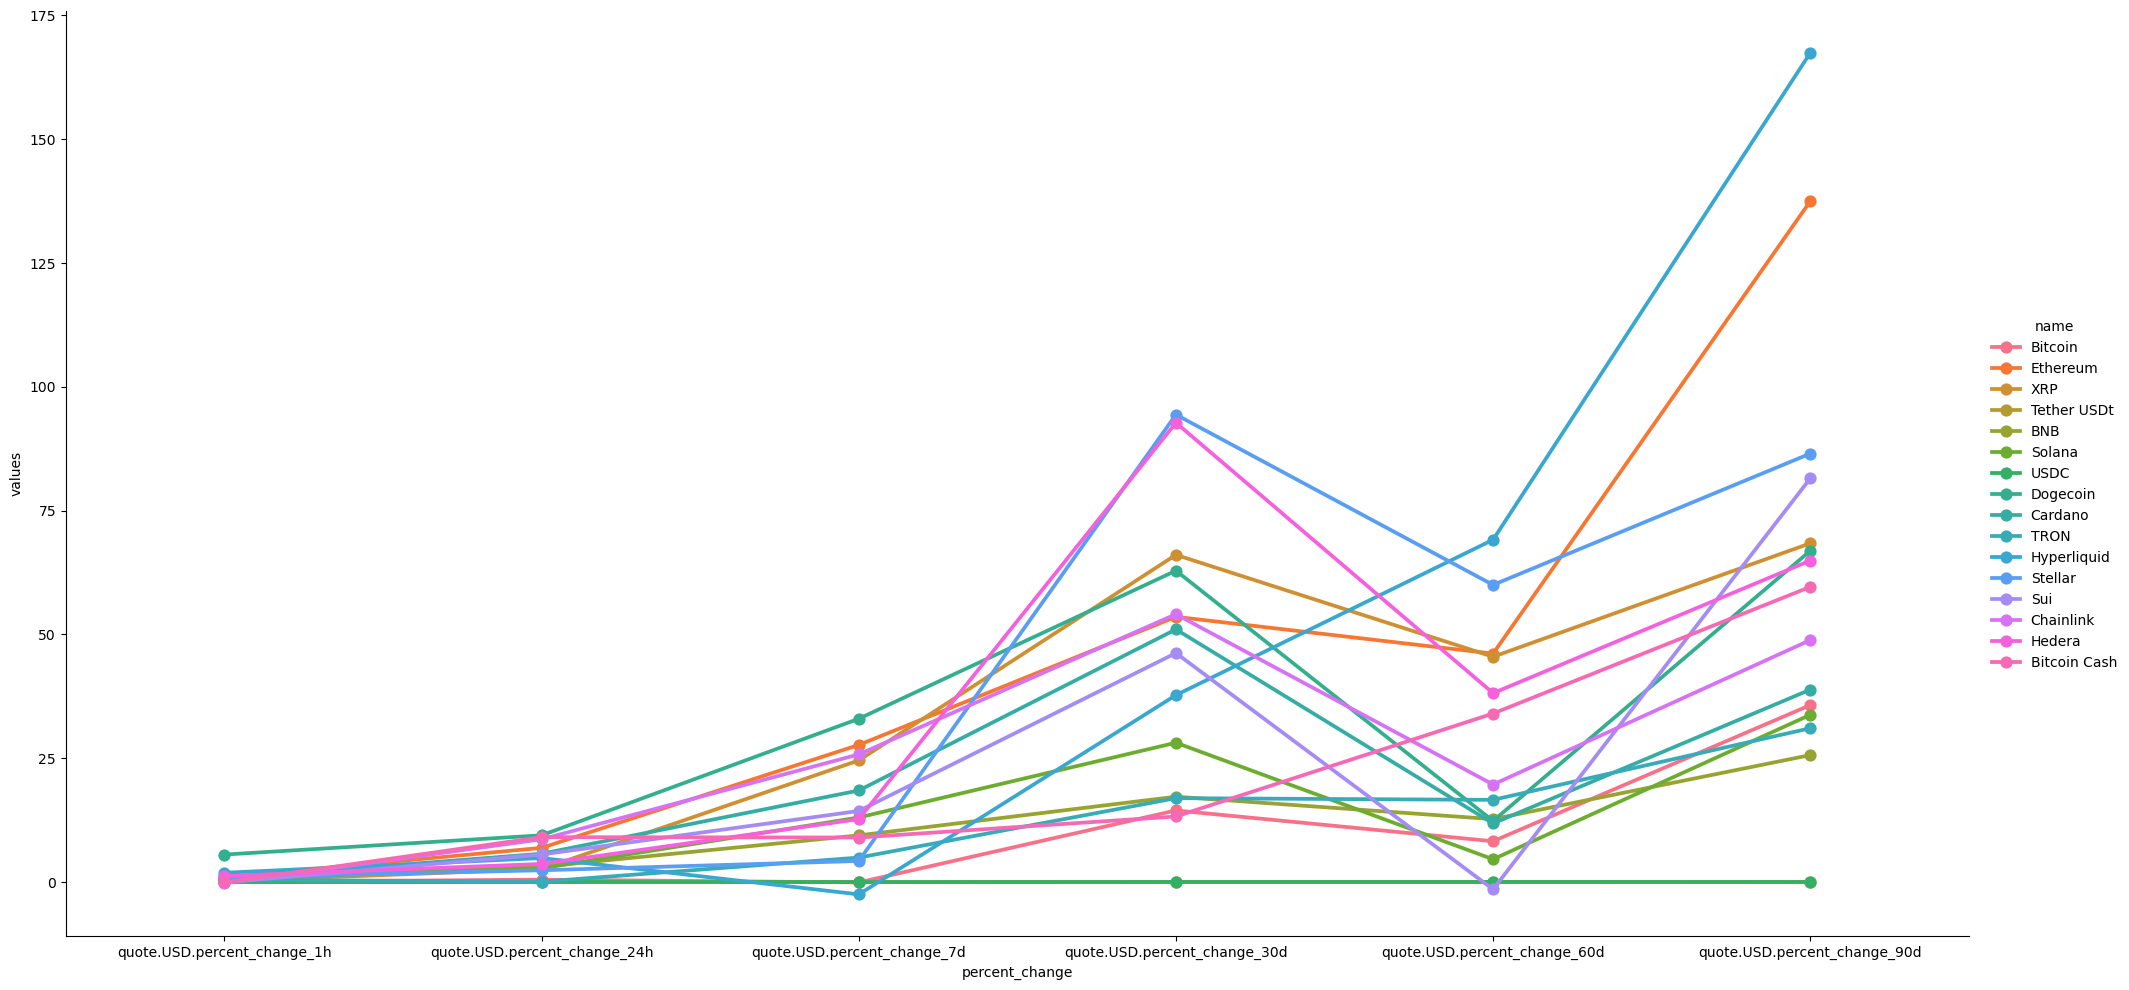

In [26]:
## Visualization part
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='percent_change',y='values',hue='name',data=df4,kind='point',height=10,aspect=2) ##hue=name creates legend

In [27]:
##Now, we can also take into account just one coin and see its pattern over time. Looking at the graph, Hyperliquid seems
##to have the highest positive rate of change over a 3 month period. So, we will take that as an example.
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Hyperliquid'")
df10

,name,quote.USD.price,timestamp
10,Hyperliquid,47.27735,2025-07-20 22:17:12.914811
26,Hyperliquid,47.27660,2025-07-20 22:18:13.466366
42,Hyperliquid,47.26206,2025-07-20 22:19:14.286532
58,Hyperliquid,47.16004,2025-07-20 22:20:15.219813
74,Hyperliquid,47.16510,2025-07-20 22:21:16.220664
90,Hyperliquid,47.15756,2025-07-20 22:22:17.173091


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

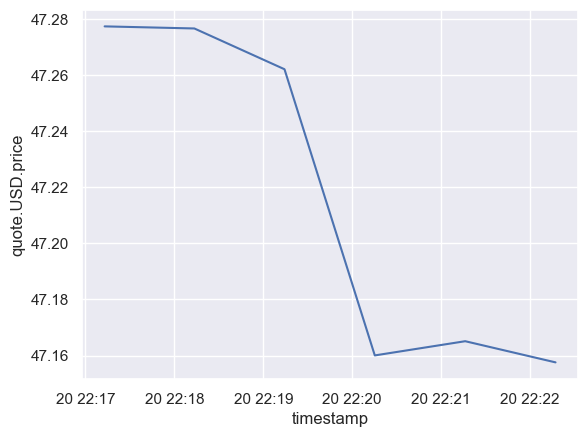

In [28]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)